# Logistic Regression on Bank data

### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv('Bank-data.csv', index_col=0)

In [3]:
raw_data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [4]:
data = raw_data.copy()
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [5]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression.

In [6]:
x = sm.add_constant(x1)
reg = sm.Logit(y, x).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


E:\softwares\softwares_installation\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 May 2020   Pseudo R-squ.:                  0.2121
Time:                        02:51:43   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

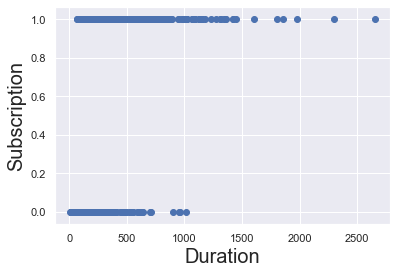

In [7]:
plt.scatter(x1,y)
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

### Interpretation

In [8]:
np.exp(0.0051)

1.005113027136717

The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression.

Note that we could have inferred that from the coefficient itself.

Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

## Extending Model:
We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again.

In [9]:
estimators=['interest_rate','march','credit','previous','duration']

X1 = data[estimators]
y = data['y']

In [10]:
X = sm.add_constant(X1)
extend_reg = sm.Logit(y, X).fit()
extend_reg.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 May 2020   Pseudo R-squ.:                  0.5143
Time:                        02:51:44   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

In [11]:
def confusion_matrix(independent_variables, actual_values, model):
    #Predict the values using the Logit model
    pred_values = model.predict(independent_variables)
    # Specify the bins 
    bins=np.array([0,0.5,1])
    # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
    # if they are between 0.5 and 1, they will be considered 1
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    # Return the confusion matrix and accuracy
    return cm, accuracy

In [12]:
confusion_matrix(X, y, extend_reg)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

## Checking for Overfit
Lets split the data to train and test of ration 70:30

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.1, random_state=365)

In [14]:
# creating a model with train dataset
X_Train = sm.add_constant(x_train)
reg_train = sm.Logit(y_train, X_Train).fit()
reg_train.summary()

Optimization terminated successfully.
         Current function value: 0.341048
         Iterations 7


E:\softwares\softwares_installation\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  466
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 May 2020   Pseudo R-squ.:                  0.5078
Time:                        02:51:45   Log-Likelihood:                -158.93
converged:                       True   LL-Null:                       -322.90
Covariance Type:            nonrobust   LLR p-value:                 9.791e-69
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1740      0.326     -0.534      0.593      -0.813       0.465
interest_rate    -0.7463      0.091     -8.180      0.000      -0.925      -0.567
march            -1.9605      0.358     -5.479      0.000      -2.662      -1.259
credit            2.2070      1.101      2.004      0.045       0.049       4.365
previous          1.7557      0.589      2.983      0.003       0.602       2.909
duration          0.0070      0.001      9.142      0.000       0.005       0.008
=================================================================================
"""

In [15]:
cm_train = confusion_matrix(X_Train, y_train, reg_train)
cm_train

(array([[203.,  35.],
        [ 28., 200.]]), 0.8648068669527897)

In [16]:
# creating a model for test data
X_Test = sm.add_constant(x_test)
reg_test = sm.Logit(y_test, X_Test).fit()
reg_test.summary()

         Current function value: 0.190591
         Iterations: 35


E:\softwares\softwares_installation\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 May 2020   Pseudo R-squ.:                  0.7175
Time:                        02:51:45   Log-Likelihood:                -9.9107
converged:                      False   LL-Null:                       -35.076
Covariance Type:            nonrobust   LLR p-value:                 1.186e-09
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4838      1.365      1.087      0.277      -1.191       4.159
interest_rate    -2.8513      1.505     -1.894      0.058      -5.801       0.099
march            -0.8580      1.161     -0.739      0.460      -3.134       1.418
credit           13.8023    336.523      0.041      0.967    -645.770     673.375
previous         -0.5451      1.248     -0.437      0.662      -2.991       1.901
duration          0.0129      0.007      1.972      0.049    7.91e-05       0.026
=================================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
cm_test = confusion_matrix(X_Test, y_test, reg_test)
cm_test

(array([[17.,  4.],
        [ 1., 30.]]), 0.9038461538461539)

Looking at the test acccuracy we see a number which is higher: 90.38%, compared to 86.48% for train accuracy.

In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck.